In [148]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multitest import multipletests
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova

In [149]:
def calc_mean_het_lvl(het_df):
    het_df = het_df[het_df['Total_Depth'] >= 1000]
    het_df = het_df[het_df['Total_Depth'] >= 1000].reset_index().drop(columns=['index'])

    het_lvls = pd.DataFrame(columns=['sample', 'het_lvl'])
    for i in het_df.index:
        sample = ref_allele = het_df.iloc[i,0]
        ref_allele = het_df.iloc[i,2]
        ref_fraction = het_df[f"Fraction_{ref_allele}"][i]

        minority_fraction = 1 - ref_fraction
        het_lvls.loc[i,'sample'] = sample
        het_lvls.loc[i,'het_lvl'] = minority_fraction

    het_lvls = het_lvls[(het_lvls['het_lvl'] >= 0.05) & (het_lvls['het_lvl'] <= 0.95)]
    het_lvls = het_lvls.groupby('sample').mean()

    return het_lvls

In [150]:
het_all = pd.read_csv('../data/heteroplasmy_ALL.csv')
anamnesis = pd.read_csv('../data/anamnesis.csv', index_col=0)
cytokines = pd.read_csv('../data/cytokines.csv', header=[0, 1], index_col=0)

het_lvl = calc_mean_het_lvl(het_all)

anamnesis = anamnesis.iloc[:,0].map({"МС":1, "ГС":0, "УЗД":0}) # all russian letters, smh

# keep fold-change only
columns_to_keep = []
for col in cytokines.columns:
    if col[1] == 'FC':
        columns_to_keep.append(col)

fc_df = cytokines[columns_to_keep]
fc_df.columns = [col[0] for col in fc_df.columns]

fc_df['mean_het_lvl'] = het_lvl.reindex(fc_df.index)
fc_df['disease'] = anamnesis.reindex(fc_df.index)
fc_df = fc_df.dropna()

/tmp/ipykernel_144102/2822989843.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['mean_het_lvl'] = het_lvl.reindex(fc_df.index)
/tmp/ipykernel_144102/2822989843.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['disease'] = anamnesis.reindex(fc_df.index)


In [151]:
fc_df

,IL-6,MCP-1,IL-1b,TNF-a,IL-10,IL-8,mean_het_lvl,disease
5,220.947754,43.464305,2.795976,307.813620,75.573990,8.518603,0.095706,1
6,99.129891,12.545548,1.970814,12.892022,14.675090,157.289657,0.371491,1
7,71.148681,3.026672,2.425959,24.003158,23.084995,1.000000,0.089496,1
11,20.000000,1.215848,3.190663,24.434444,24.109061,1.000000,0.448596,1
13,88.591794,4.507878,1.888006,20.632980,34.908852,2.485923,0.253391,1
15,36.828329,0.962080,1.821174,12.118703,17.131901,1.000000,0.087325,1
27,412.888465,11.685180,5.505951,41.587768,344.189944,8.995548,0.088332,1
31,158.174432,11.314378,4.322621,72.791282,79.709176,1.813686,0.090535,1
40,2990.356958,91.986430,3.861303,77.112394,1225.374613,6.205014,0.083177,1
46,331.646638,226.317705,36.819897,178.050036,154.324930,18.253838,0.083149,0


In [111]:
fc_df['disease'].value_counts()

disease
0    37
1    20
Name: count, dtype: int64

In [112]:
X = fc_df.drop('disease', axis=1)
y = fc_df['disease']    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
pca = PCA()  # We'll keep 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

In [114]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components shape:", principal_components.shape)

Explained variance ratio: [0.28335781 0.19849911 0.17077559 0.12539069 0.10556884 0.08346955
 0.0329384 ]
Principal components shape: (57, 7)


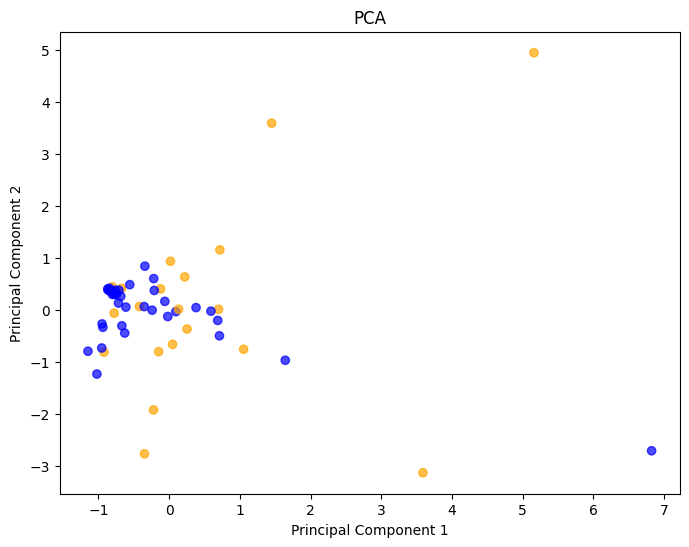

In [115]:
# Create a color list based on True/False
color_dict = {0: 'blue', 1: 'orange', 2:"red"}


colors = [color_dict[val] for val in y]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], 
                      principal_components[:, 1], 
                      c=colors,
                      alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [125]:
# manova breakes with dashes
fc_df.columns = ['IL6', 'MCP1', 'IL1b', 'TNFa', 'IL10', 'IL8', 'mean_het_lvl', 'disease']
fc_df_scaled = fc_df.copy()

# mean_het_lvl is weird af for manova, so we need to use scaler. manova IS NOT affected by scaling, it's required just to run it
fc_df_scaled[fc_df_scaled.columns[:-1]] = StandardScaler().fit_transform(fc_df_scaled[fc_df_scaled.columns[:-1]])

manova = MANOVA.from_formula('IL6 + MCP1 + IL1b + TNFa + IL10 + IL8 + mean_het_lvl ~ disease', 
                             data=fc_df_scaled)
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8904 7.0000 49.0000  0.8613 0.5433
         Pillai's trace 0.1096 7.0000 49.0000  0.8613 0.5433
 Hotelling-Lawley trace 0.1230 7.0000 49.0000  0.8613 0.5433
    Roy's greatest root 0.1230 7.0000 49.0000  0.8613 0.5433
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.7404 7.0000 49.0000  2.4548 0.0306
         Pillai's trace 0.2596 7.0000 49.0000  2.4548 0.0306
 Hotelling-Lawley trace 0.3507 7.0000 49.0

In [ ]:
cytokines = ['IL6', 'MCP1', 'IL1b', 'TNFa', 'IL10', 'IL8', 'mean_het_lvl'] # het is not cyto, but whatever, you get the idea

results = []
for cyto in cytokines:
    group_false = fc_df_scaled[fc_df_scaled['disease'] == 0][cyto]
    group_true = fc_df_scaled[fc_df_scaled['disease'] == 1][cyto]
    
    # Normality check
    p_norm_false = shapiro(group_false).pvalue
    p_norm_true = shapiro(group_true).pvalue
    
    # Choose test
    if p_norm_false > 0.05 and p_norm_true > 0.05:
        stat, pval = ttest_ind(group_false, group_true, equal_var=False)
        test_type = 't-test'
    else:
        stat, pval = mannwhitneyu(group_false, group_true, alternative='two-sided')
        test_type = 'Mann-Whitney'
    
    results.append((cyto, test_type, pval))

# Multiple testing correction
df_results = pd.DataFrame(results, columns=['Cytokine', 'Test', 'p-value'])
df_results['p-adjusted'] = multipletests(df_results['p-value'], method='fdr_bh')[1]

print(df_results)


       Cytokine          Test   p-value  p-adjusted
0           IL6  Mann-Whitney  0.004594    0.025139
1          MCP1  Mann-Whitney  0.051416    0.089978
2          IL1b  Mann-Whitney  0.086548    0.102501
3          TNFa  Mann-Whitney  0.010774    0.025139
4          IL10  Mann-Whitney  0.009319    0.025139
5           IL8  Mann-Whitney  0.087858    0.102501
6  mean_het_lvl  Mann-Whitney  0.212871    0.212871
